## Importing data

As always, in order to work with data in python, we need a library that will let us handle "data exploration." We looked at geopandas last week, but let's go to its origin, the one and only, `pandas` library.

* https://pandas.pydata.org/

In [1]:
import pandas as pd

Next, we make the call to load and read the data that was downloaded from social explorer. Again, take note at the relative path reference to find the file in your file directory.

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/jovyan/22W-UP206A/Weeks/Week03


In [3]:
os.chdir('/home/jovyan/22W-UP206A/Weeks/Week03')

In [4]:
# load a data file
# note the relative filepath! where is this file located?
df = pd.read_csv('data/HVI2.csv')

## Preliminary inspection
A quick look at the size of the data.

In [5]:
df.shape

(199, 72)

In [ ]:
df.head()

## Overwriting default display settings 
By default, pandas outputs the first 10 and last 10 columns. If we want to see the entire table, we can override the defaults. Use with caution!

In [ ]:
# I want to see all the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.sample()

## Data types

To get the data types, we will use `.info()`. Notice the new arguments within: `verbose=True, null_counts=True`. This is necessary because our data has so many columns.

In [6]:
# look at the data types
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Census tract name         199 non-null    float64
 1   Geo_ID                    199 non-null    int64  
 2   FIPS                      199 non-null    int64  
 3   Population                199 non-null    int64  
 4   LST_Mean                  199 non-null    float64
 5   Outdoor                   198 non-null    float64
 6   ExtremeHeat               199 non-null    float64
 7   NoCanopy                  193 non-null    float64
 8   CarCommuters              193 non-null    float64
 9   Contamination             198 non-null    float64
 10  EnergyBill                198 non-null    float64
 11  Asthma                    198 non-null    float64
 12  CardioVascular            198 non-null    float64
 13  BirthWeight               195 non-null    float64
 14  DiabetesMe

/tmp/ipykernel_122/175451509.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


## Assigning data types on import

Let's take a closer look at the column that will become our unique identifier, `Geo_FIPS`.

In [7]:
df.FIPS.head()

0    6019000100
1    6019000200
2    6019000300
3    6019000400
4    6019000501
Name: FIPS, dtype: int64

### The leading zero dilemma...
Waaaaaiiit... what happened to the leading "0" in the `Geo_FIPS` code? And for that matter, the `geo_STATE` and `geo_COUNTY` columns?

In [ ]:
df.Weighted_HVI.head()

In [ ]:
df.FIPS.head()

In [ ]:
df.Geo_ID.head()

### The FIPS code
But what is a FIPS code and why is it important?

![fips](images/fips.png)

![fips code](https://learn.arcgis.com/en/related-concepts/GUID-D7AA4FD1-E7FE-49D7-9D11-07915C9ACC68-web.png)

[Source: ESRI](https://learn.arcgis.com/en/related-concepts/united-states-census-geography.htm)

That's right, python automatically makes decisions on import, and interprets "FIPS" as an integer column (after all, it's all numbers aren't they), thus cropping the leading zeroes. But no, that [leading zero](https://en.wikipedia.org/wiki/Leading_zero) is extremely important, as `06` represents the state of California, and `037` represents LA County. 

Let's fix this by re-importing the data, this time, specifying the `FIPS` columns as a string:

In [8]:
df = pd.read_csv(
    'data/HVI2.csv',
    dtype=
    {
        'Geo_ID':str,
        'FIPS':str,
    }
)

In [9]:
df['Weighted_HVI'].astype(pd.np.int64)

/tmp/ipykernel_122/2124262520.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Weighted_HVI'].astype(pd.np.int64)


0       8
1      13
2      12
3      12
4      12
       ..
194    11
195    11
196     9
197    12
198    11
Name: Weighted_HVI, Length: 199, dtype: int64

In [10]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Census tract name         199 non-null    float64
 1   Geo_ID                    199 non-null    object 
 2   FIPS                      199 non-null    object 
 3   Population                199 non-null    int64  
 4   LST_Mean                  199 non-null    float64
 5   Outdoor                   198 non-null    float64
 6   ExtremeHeat               199 non-null    float64
 7   NoCanopy                  193 non-null    float64
 8   CarCommuters              193 non-null    float64
 9   Contamination             198 non-null    float64
 10  EnergyBill                198 non-null    float64
 11  Asthma                    198 non-null    float64
 12  CardioVascular            198 non-null    float64
 13  BirthWeight               195 non-null    float64
 14  DiabetesMe

/tmp/ipykernel_122/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [11]:
# now look at the data again
df.head()

Census tract name      Geo_ID         FIPS  Population   LST_Mean  \
0               1.00  6019000100  06019000100        3676  51.859195   
1               2.00  6019000200  06019000200        2689  53.129992   
2               3.00  6019000300  06019000300        4225  52.439347   
3               4.00  6019000400  06019000400        5498  52.277120   
4               5.01  6019000501  06019000501        2532  49.437482   

    Outdoor  ExtremeHeat  NoCanopy  CarCommuters  Contamination  ...  \
0  0.154028         51.8       NaN           NaN         733.95  ...   
1  0.592034         51.8  0.963486      0.945392         733.95  ...   
2  0.533286         51.8  0.942622      0.849656         733.95  ...   
3  0.462065         51.8  0.954435      0.963781         733.95  ...   
4  0.681514         51.8  0.938049      0.930870         733.95  ...   

   LessThanVWellEnglish_HVI  Non-white_HVI  LessThanHS_HVI  \
0                         3              4               4   
1                         4              5               5   
2                         4              5               4   
3                         4              5               4   
4                         5              5               5   

   LessThan200Poverty_HVI  AdultsNoInsurance_HVI  HouseholdNoCar_HVI  \
0                       4                      1                   2   
1                       5                      1                   5   
2                       5                      2                   5   
3                       5                      3                   4   
4                       5                      2                   6   

   NonHomeOwner_HVI  Rent Severe_HVI  UnWeight_HVI  Weighted_HVI  
0                 1                1            62      8.515873  
1                 5                5            97     13.309524  
2                 4                3            91     12.547619  
3                 4                3            91     12.476190  
4                 5                6            93     12.444444  

[5 rows x 72 columns]

Confirm that your new dataframe has the correct datatypes.

In [12]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Census tract name         199 non-null    float64
 1   Geo_ID                    199 non-null    object 
 2   FIPS                      199 non-null    object 
 3   Population                199 non-null    int64  
 4   LST_Mean                  199 non-null    float64
 5   Outdoor                   198 non-null    float64
 6   ExtremeHeat               199 non-null    float64
 7   NoCanopy                  193 non-null    float64
 8   CarCommuters              193 non-null    float64
 9   Contamination             198 non-null    float64
 10  EnergyBill                198 non-null    float64
 11  Asthma                    198 non-null    float64
 12  CardioVascular            198 non-null    float64
 13  BirthWeight               195 non-null    float64
 14  DiabetesMe

/tmp/ipykernel_122/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<div class="alert alert-danger">
    
The [leading zero dilemma](https://en.wikipedia.org/wiki/Leading_zero) is a known enigma in GIS and data integration. Even ESRI has yet to find a clean solution to this problem, forcing users into resorting to [weird hacks](https://support.esri.com/en/technical-article/000013035) to circumvent this problem. Python and pandas actually gives us a "clean-ish" solution that makes logical sense... doesn't it?
    
</div>

## Drop/Delete null columns
By default, social explorer creates many columns. Many of them have null values from top to bottom. What are the null columns? You can find out using the handy `isna()` command. Notice the chain of commands.

[isna().all()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

The `.all()` indicates that you want to find the columns that have ALL empty values. The other option would be `.any()` which would list all columns that have *at least one* empty value. 

In [13]:
df.columns[df.isna().all()].tolist()

[]

Let's eliminate these. There is a handy pandas command to do so `.dropna()`. The arguments are `axis=1` which indicates you want to eliminate *columns* (`axis=0` would eliminate rows), and `how="all"` to remove columns where all values are empty.

* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [14]:
df = df.dropna(axis=1,how="all")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Census tract name         199 non-null    float64
 1   Geo_ID                    199 non-null    object 
 2   FIPS                      199 non-null    object 
 3   Population                199 non-null    int64  
 4   LST_Mean                  199 non-null    float64
 5   Outdoor                   198 non-null    float64
 6   ExtremeHeat               199 non-null    float64
 7   NoCanopy                  193 non-null    float64
 8   CarCommuters              193 non-null    float64
 9   Contamination             198 non-null    float64
 10  EnergyBill                198 non-null    float64
 11  Asthma                    198 non-null    float64
 12  CardioVascular            198 non-null    float64
 13  BirthWeight               195 non-null    float64
 14  DiabetesMe

In [16]:
# reinspect the data
df.head()

Census tract name      Geo_ID         FIPS  Population   LST_Mean  \
0               1.00  6019000100  06019000100        3676  51.859195   
1               2.00  6019000200  06019000200        2689  53.129992   
2               3.00  6019000300  06019000300        4225  52.439347   
3               4.00  6019000400  06019000400        5498  52.277120   
4               5.01  6019000501  06019000501        2532  49.437482   

    Outdoor  ExtremeHeat  NoCanopy  CarCommuters  Contamination  ...  \
0  0.154028         51.8       NaN           NaN         733.95  ...   
1  0.592034         51.8  0.963486      0.945392         733.95  ...   
2  0.533286         51.8  0.942622      0.849656         733.95  ...   
3  0.462065         51.8  0.954435      0.963781         733.95  ...   
4  0.681514         51.8  0.938049      0.930870         733.95  ...   

   LessThanVWellEnglish_HVI  Non-white_HVI  LessThanHS_HVI  \
0                         3              4               4   
1                         4              5               5   
2                         4              5               4   
3                         4              5               4   
4                         5              5               5   

   LessThan200Poverty_HVI  AdultsNoInsurance_HVI  HouseholdNoCar_HVI  \
0                       4                      1                   2   
1                       5                      1                   5   
2                       5                      2                   5   
3                       5                      3                   4   
4                       5                      2                   6   

   NonHomeOwner_HVI  Rent Severe_HVI  UnWeight_HVI  Weighted_HVI  
0                 1                1            62      8.515873  
1                 5                5            97     13.309524  
2                 4                3            91     12.547619  
3                 4                3            91     12.476190  
4                 5                6            93     12.444444  

[5 rows x 72 columns]

## Dropping columns by name
We dropped the columns with empty values. There are still columns that we do not need, so let's eliminate those as well. First, create a list of column names that we want to drop.

In [ ]:
# list of additional columns to drop
#columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

In [ ]:
# next, drop them!
#df = df.drop(columns_to_drop,axis=1)
#df.head()

## The census data dictionary
What are these columns? Column headers are defined in the data dictionary text file downloaded from social explorer. For your reference, it has been uploaded to the data directory in this folder.
* [data dictionary](data/se_la_race_dict.txt)

## Renaming columns

Let's rename the columns. First, create a list of column names as they are now.

In [17]:
columns = list(df) # this is the same as df.columns.to_list()
columns

['Census tract name',
 'Geo_ID',
 'FIPS',
 'Population',
 'LST_Mean',
 'Outdoor',
 'ExtremeHeat',
 'NoCanopy',
 'CarCommuters',
 'Contamination',
 'EnergyBill',
 'Asthma',
 'CardioVascular',
 'BirthWeight',
 'DiabetesMellitus',
 'Age_Under5',
 'Elders',
 '65_Alone',
 'LessThanVWellEnglish',
 'Non-white',
 'LessThanHS',
 'LessThan200Poverty',
 'AdultsNoInsurance',
 'HouseholdNoCar',
 'NonHomeOwner',
 'Rent Severe',
 'LST_Mean_Z',
 'Outdoor_Z',
 'ExtremeHeat_Z',
 'NoCanopy_Z',
 'CarCommuter_Z',
 'Contamination_Z',
 'EnergyBill_Z',
 'Asthma_Z',
 'CardioVascular_Z',
 'BirthWeight_Z',
 'DiabetesMellitus_Z',
 'Age_Under5_Z',
 'Elders_Z',
 '65_Alone_Z',
 'LessThanVWellEnglish_Z',
 'NonWhite_Z',
 'NonWhite_Z.1',
 'LessThan200Poverty_Z',
 'AdultsNoInsurance_Z',
 'HouseholdNoCar_Z',
 'NonHomeOwner_Z',
 'Rent_Severe_Z',
 'LST_Mean_HVI',
 'Outdoor_HVI',
 'ExtremeHeat_HVI',
 'NoCanopy_HVI',
 'CarCommuters_HVI',
 'Contamination_HVI',
 'EnergyBill_HVI',
 'Asthma_HVI',
 'CardioVascular_HVI',
 'BirthWe

Then, simply copy and paste the output list above, and define the columns with it. Replace the values with your desired column names

In [18]:
df.columns = ['CensusTract',
 'Geo_ID',
 'FIPS',
 'Population',
 'LST_Mean',
 'Outdoor',
 'ExtremeHeat',
 'NoCanopy',
 'CarCommuters',
 'Contamination',
 'EnergyBill',
 'Asthma',
 'CardioVascular',
 'BirthWeight',
 'DiabetesMellitus',
 'Age_Under5',
 'Elders',
 '65_Alone',
 'LessThanVWellEnglish',
 'Non-white',
 'LessThanHS',
 'LessThan200Poverty',
 'AdultsNoInsurance',
 'HouseholdNoCar',
 'NonHomeOwner',
 'Rent Severe',
 'LST_Mean_Z',
 'Outdoor_Z',
 'ExtremeHeat_Z',
 'NoCanopy_Z',
 'CarCommuter_Z',
 'Contamination_Z',
 'EnergyBill_Z',
 'Asthma_Z',
 'CardioVascular_Z',
 'BirthWeight_Z',
 'DiabetesMellitus_Z',
 'Age_Under5_Z',
 'Elders_Z',
 '65_Alone_Z',
 'LessThanVWellEnglish_Z',
 'NonWhite_Z',
 'NonWhite_Z.1',
 'LessThan200Poverty_Z',
 'AdultsNoInsurance_Z',
 'HouseholdNoCar_Z',
 'NonHomeOwner_Z',
 'Rent_Severe_Z',
 'LST_Mean_HVI',
 'Outdoor_HVI',
 'ExtremeHeat_HVI',
 'NoCanopy_HVI',
 'CarCommuters_HVI',
 'Contamination_HVI',
 'EnergyBill_HVI',
 'Asthma_HVI',
 'CardioVascular_HVI',
 'BirthWeight_HVI',
 'DiabetesMellitus_HVI',
 'Age_Under5_HVI',
 'Elders_HVI',
 '65_Alone_HVI',
 'LessThanVWellEnglish_HVI',
 'Non-white_HVI',
 'LessThanHS_HVI',
 'LessThan200Poverty_HVI',
 'AdultsNoInsurance_HVI',
 'HouseholdNoCar_HVI',
 'NonHomeOwner_HVI',
 'Rent Severe_HVI',
 'UnWeight_HVI',
 'Weighted_HVI']

In [19]:
df.head()

CensusTract      Geo_ID         FIPS  Population   LST_Mean   Outdoor  \
0         1.00  6019000100  06019000100        3676  51.859195  0.154028   
1         2.00  6019000200  06019000200        2689  53.129992  0.592034   
2         3.00  6019000300  06019000300        4225  52.439347  0.533286   
3         4.00  6019000400  06019000400        5498  52.277120  0.462065   
4         5.01  6019000501  06019000501        2532  49.437482  0.681514   

   ExtremeHeat  NoCanopy  CarCommuters  Contamination  ...  \
0         51.8       NaN           NaN         733.95  ...   
1         51.8  0.963486      0.945392         733.95  ...   
2         51.8  0.942622      0.849656         733.95  ...   
3         51.8  0.954435      0.963781         733.95  ...   
4         51.8  0.938049      0.930870         733.95  ...   

   LessThanVWellEnglish_HVI  Non-white_HVI  LessThanHS_HVI  \
0                         3              4               4   
1                         4              5               5   
2                         4              5               4   
3                         4              5               4   
4                         5              5               5   

   LessThan200Poverty_HVI  AdultsNoInsurance_HVI  HouseholdNoCar_HVI  \
0                       4                      1                   2   
1                       5                      1                   5   
2                       5                      2                   5   
3                       5                      3                   4   
4                       5                      2                   6   

   NonHomeOwner_HVI  Rent Severe_HVI  UnWeight_HVI  Weighted_HVI  
0                 1                1            62      8.515873  
1                 5                5            97     13.309524  
2                 4                3            91     12.547619  
3                 4                3            91     12.476190  
4                 5                6            93     12.444444  

[5 rows x 72 columns]

## Simple stats and plots

In [ ]:
# access a single column like df['col_name']
df['NoCanopy'].head()

In [ ]:
# What is the mean?
df['NoCanopy'].mean()

In [20]:
# get some stats
df['Weighted_HVI'].describe()

count    199.000000
mean      10.477866
std        1.535414
min        5.095238
25%        9.396825
50%       10.515873
75%       11.714286
max       13.753968
Name: Weighted_HVI, dtype: float64

In [ ]:
# plot it as a historgram with 50 bins
df['Weighted_HVI'].plot.hist(bins=50)

<div class="alert alert-info">
    Now it's your turn. Find some stats for different fields in the data and output them below.
    </div>

In [ ]:
df['CardioVascular'].describe()

## Displaying null/missing values
Earlier, we eliminated columns where *all* values were null. However, there may still exist null values in individual cells throughout the table. Null values, or empty values, can be problematic in many ways. It is always good practice to scrutinize your data for missing values, and to identify where they are and why. The following arguments are simple calls to the data to find where these null values are.

In [21]:
# first double check how many rows we have
len(df)

199

In [22]:
# null values in the data for a all columns
df.isna().sum()

CensusTract           0
Geo_ID                0
FIPS                  0
Population            0
LST_Mean              0
                     ..
HouseholdNoCar_HVI    0
NonHomeOwner_HVI      0
Rent Severe_HVI       0
UnWeight_HVI          0
Weighted_HVI          0
Length: 72, dtype: int64

Which rows have null values, and how many? Let's output these rows.

In [ ]:
# show rows with null columns
df[df['NoCanopy'].isnull()]

Why do these rows have null values?

## Sorting
What are the top 10 most populated census tracts? What are the census tracts with the highest black popluation? To answer these questions, the simplest method is to sort the data by their respective columns.

In [23]:
df_sorted = df.sort_values(by='Weighted_HVI',ascending = False)

In [24]:
# display the data, but just a few columns to keep it clean
df_sorted[['CensusTract','Weighted_HVI']].head(10)

CensusTract  Weighted_HVI
10         9.02     13.753968
11        10.00     13.730159
12        11.00     13.563492
37        25.02     13.507937
1          2.00     13.309524
7          7.00     13.230159
9          9.01     13.063492
35        24.00     12.857143
16        13.03     12.809524
42        28.00     12.698413

<AxesSubplot:xlabel='CensusTract'>

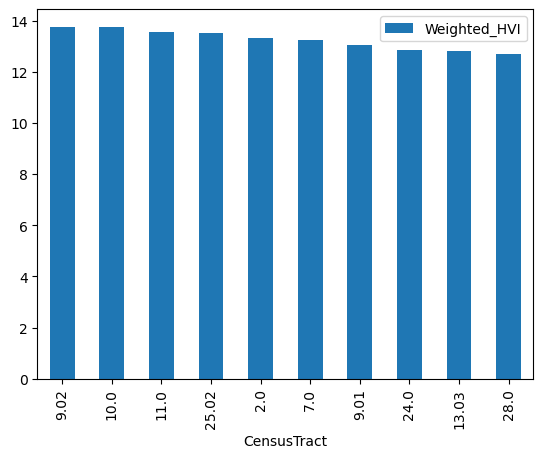

In [25]:
# plot it
df_sorted.head(10).plot.bar(x='CensusTract',
                            y='Weighted_HVI')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Heat Vulnerability in Fresno County'}, xlabel='CensusTract'>

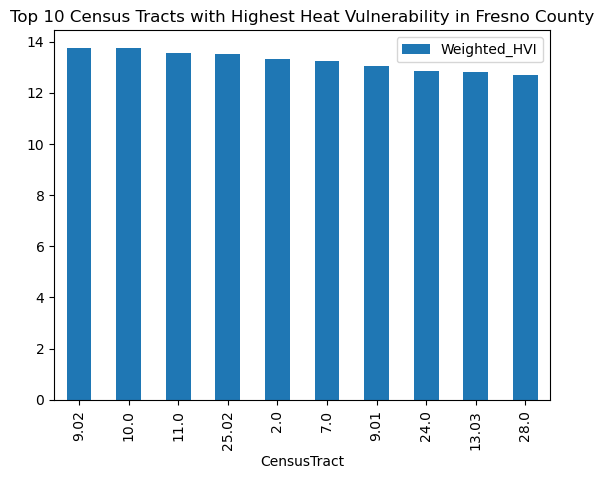

In [26]:
# Make it prettier with a title
df_sorted.head(10).plot.bar(x='CensusTract',
                            y='Weighted_HVI', 
                            title='Top 10 Census Tracts with Highest Heat Vulnerability in Fresno County')

<div class="alert alert-info">
    Now it's your turn! Create a table and accompanying bar plot for the top 10 values for column of your choice
</div>

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Heat Vulnerable populations in Fresno County'}, xlabel='CensusTract'>

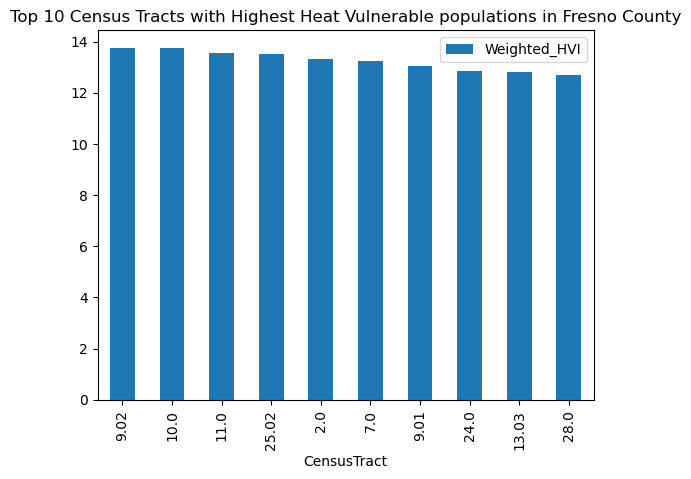

In [27]:
df_sorted = df.sort_values(by='Weighted_HVI',ascending = False)
df_sorted[['CensusTract','Weighted_HVI']].head(10)
df_sorted.head(10).plot.bar(x='CensusTract',
                            y='Weighted_HVI', 
                            title='Top 10 Census Tracts with Highest Heat Vulnerable populations in Fresno County')

## Filtering and subsetting data
Sorting is one method, but the process of discovery compels us to interrogate the data in different ways. One method of doing so is to query, or filter the data to see specific views of the data based on a question you may have. For example, what are the census tract that have no people in them? Or, Which census tracts are more than 75% black?

In [28]:
# subset the data so that we can see the data per row... 
# in other words, this syntax is asking to "show me the values in my dataframe that match this filter
df[df['Weighted_HVI']==0]

Empty DataFrame
Columns: [CensusTract, Geo_ID, FIPS, Population, LST_Mean, Outdoor, ExtremeHeat, NoCanopy, CarCommuters, Contamination, EnergyBill, Asthma, CardioVascular, BirthWeight, DiabetesMellitus, Age_Under5, Elders, 65_Alone, LessThanVWellEnglish, Non-white, LessThanHS, LessThan200Poverty, AdultsNoInsurance, HouseholdNoCar, NonHomeOwner, Rent Severe, LST_Mean_Z, Outdoor_Z, ExtremeHeat_Z, NoCanopy_Z, CarCommuter_Z, Contamination_Z, EnergyBill_Z, Asthma_Z, CardioVascular_Z, BirthWeight_Z, DiabetesMellitus_Z, Age_Under5_Z, Elders_Z, 65_Alone_Z, LessThanVWellEnglish_Z, NonWhite_Z, NonWhite_Z.1, LessThan200Poverty_Z, AdultsNoInsurance_Z, HouseholdNoCar_Z, NonHomeOwner_Z, Rent_Severe_Z, LST_Mean_HVI, Outdoor_HVI, ExtremeHeat_HVI, NoCanopy_HVI, CarCommuters_HVI, Contamination_HVI, EnergyBill_HVI, Asthma_HVI, CardioVascular_HVI, BirthWeight_HVI, DiabetesMellitus_HVI, Age_Under5_HVI, Elders_HVI, 65_Alone_HVI, LessThanVWellEnglish_HVI, Non-white_HVI, LessThanHS_HVI, LessThan200Poverty_HVI, AdultsNoInsurance_HVI, HouseholdNoCar_HVI, NonHomeOwner_HVI, Rent Severe_HVI, UnWeight_HVI, Weighted_HVI]
Index: []

[0 rows x 72 columns]

Note that unless you specify the resulting output as a new variable, the results are only temporary (in memory). If you want to use the results for subsequent analysis, you need to create a new variable.

In [29]:
# create a new variable for census tracts with zero pop
df_Weighted_HVI_hi = df[df['Weighted_HVI']>=12]

In [30]:
# how many records?
print('There are ' + str(len(df_Weighted_HVI_hi)) + ' census tracts with an HVI score greater than 12')

There are 32 census tracts with an HVI score greater than 12


In [31]:
# display it
df_Weighted_HVI_hi[['CensusTract','Weighted_HVI']]

CensusTract  Weighted_HVI
1           2.00     13.309524
2           3.00     12.547619
3           4.00     12.476190
4           5.01     12.444444
5           5.02     12.325397
6           6.00     12.492063
7           7.00     13.230159
9           9.01     13.063492
10          9.02     13.753968
11         10.00     13.730159
12         11.00     13.563492
14         12.02     12.452381
15         13.01     12.269841
16         13.03     12.809524
30         19.00     12.174603
35         24.00     12.857143
37         25.02     13.507937
38         26.01     12.500000
40         27.01     12.166667
41         27.02     12.674603
42         28.00     12.698413
43         29.03     12.674603
48         30.03     12.293651
56         33.02     12.111111
99         47.04     12.214286
101        48.02     12.000000
106        52.02     12.246032
160        62.01     12.039683
168        65.02     12.182540
173        68.02     12.079365
178        71.00     12.476190
197        85.01     12.619048

<div class="alert alert-info">
    Now it's your turn! Find out how many census tracts are 75% or more Black, and output them in a table.
    <br>
    <br>
    Extra points if you can show only relevant columns, and sort them from highest to lowest!
</div>

In [32]:
df[df['Weighted_HVI']>=12]
df_Weighted_HVI_hi = df[df['Weighted_HVI']>=12]
df_Weighted_HVI_hi[['CensusTract','Weighted_HVI']] 

CensusTract  Weighted_HVI
1           2.00     13.309524
2           3.00     12.547619
3           4.00     12.476190
4           5.01     12.444444
5           5.02     12.325397
6           6.00     12.492063
7           7.00     13.230159
9           9.01     13.063492
10          9.02     13.753968
11         10.00     13.730159
12         11.00     13.563492
14         12.02     12.452381
15         13.01     12.269841
16         13.03     12.809524
30         19.00     12.174603
35         24.00     12.857143
37         25.02     13.507937
38         26.01     12.500000
40         27.01     12.166667
41         27.02     12.674603
42         28.00     12.698413
43         29.03     12.674603
48         30.03     12.293651
56         33.02     12.111111
99         47.04     12.214286
101        48.02     12.000000
106        52.02     12.246032
160        62.01     12.039683
168        65.02     12.182540
173        68.02     12.079365
178        71.00     12.476190
197        85.01     12.619048

# Maps!

## Geopandas to read geojson
Last week, we learned how to read a shapefile using geopandas. Geopandas can read other spatial file formats, so let's try it with the popular [geojson format](https://geojson.org/).

* Data from the LA Times [Mapping LA Boundaries](http://boundaries.latimes.com/sets/)

In [33]:
>>> import sys
>>> 'geopandas' in sys.modules

False

In [34]:
pip install geopandas

  Using cached geopandas-0.12.1-py3-none-any.whl (1.1 MB)
  Using cached Fiona-1.8.22-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.6 MB)
  Using cached pyproj-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.7 MB)
  Using cached Shapely-1.8.5.post1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.0 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import geopandas as gpd

In [36]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('data/Census_2010_Tracts.geojson')
tracts.head()

ObjectID      ID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0         1  3050.0        06        019    002800  06019002800     28   
1         2  2915.0        06        019    002701  06019002701  27.01   
2         3  2914.0        06        019    002702  06019002702  27.02   
3         4  2847.0        06        019    005000  06019005000     50   
4         5  3012.0        06        019    005405  06019005405  54.05   

           NAMELSAD10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10   INTPTLAT10  \
0     Census Tract 28   G5020          S  2639330.0       0.0  +36.7577993   
1  Census Tract 27.01   G5020          S  1300767.0       0.0  +36.7468158   
2  Census Tract 27.02   G5020          S  1307780.0       0.0  +36.7395320   
3     Census Tract 50   G5020          S  2590521.0       0.0  +36.8012804   
4  Census Tract 54.05   G5020          S  1933450.0       0.0  +36.8266460   

     INTPTLON10          LayerRefreshDate  SHAPE_Length  SHAPE_Area  \
0  -119.7453702 2021-07-26 14:13:50+00:00      0.065850    0.000266   
1  -119.7453946 2021-07-26 14:13:50+00:00      0.050690    0.000131   
2  -119.7453861 2021-07-26 14:13:50+00:00      0.051702    0.000132   
3  -119.7904326 2021-07-26 14:13:50+00:00      0.065200    0.000262   
4  -119.7677223 2021-07-26 14:13:50+00:00      0.069132    0.000195   

                                            geometry  
0  MULTIPOLYGON (((-119.75452 36.76512, -119.7528...  
1  MULTIPOLYGON (((-119.73636 36.75045, -119.7363...  
2  MULTIPOLYGON (((-119.73638 36.74319, -119.7363...  
3  MULTIPOLYGON (((-119.79955 36.79401, -119.7995...  
4  MULTIPOLYGON (((-119.78133 36.82298, -119.7813...

In [37]:
# tell me more about this dataset
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   ObjectID          199 non-null    int64              
 1   ID                199 non-null    float64            
 2   STATEFP10         199 non-null    object             
 3   COUNTYFP10        199 non-null    object             
 4   TRACTCE10         199 non-null    object             
 5   GEOID10           199 non-null    object             
 6   NAME10            199 non-null    object             
 7   NAMELSAD10        199 non-null    object             
 8   MTFCC10           199 non-null    object             
 9   FUNCSTAT10        199 non-null    object             
 10  ALAND10           199 non-null    float64            
 11  AWATER10          199 non-null    float64            
 12  INTPTLAT10        199 non-null    object             
 1

/tmp/ipykernel_122/4166793285.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  tracts.info(verbose=True, null_counts=True)


In [38]:
# we only really need FIPS and geometry, so let's subset the data
tracts = tracts[['GEOID10','geometry']]
tracts.head()

GEOID10                                           geometry
0  06019002800  MULTIPOLYGON (((-119.75452 36.76512, -119.7528...
1  06019002701  MULTIPOLYGON (((-119.73636 36.75045, -119.7363...
2  06019002702  MULTIPOLYGON (((-119.73638 36.74319, -119.7363...
3  06019005000  MULTIPOLYGON (((-119.79955 36.79401, -119.7995...
4  06019005405  MULTIPOLYGON (((-119.78133 36.82298, -119.7813...

In [39]:
# rename the columns
tracts.columns = ['FIPS','geometry']

In [40]:
tracts.head()

FIPS                                           geometry
0  06019002800  MULTIPOLYGON (((-119.75452 36.76512, -119.7528...
1  06019002701  MULTIPOLYGON (((-119.73636 36.75045, -119.7363...
2  06019002702  MULTIPOLYGON (((-119.73638 36.74319, -119.7363...
3  06019005000  MULTIPOLYGON (((-119.79955 36.79401, -119.7995...
4  06019005405  MULTIPOLYGON (((-119.78133 36.82298, -119.7813...

<AxesSubplot:>

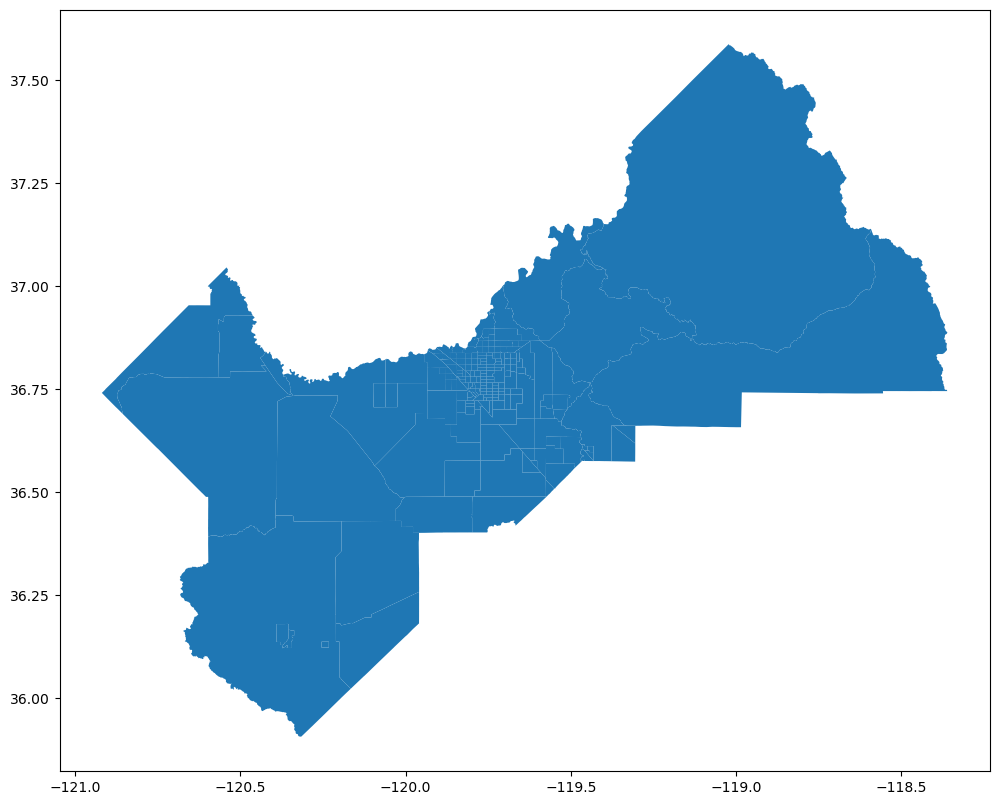

In [41]:
tracts.plot(figsize=(12,10))

## Merging/joining data

In order to map our census data from social explorer, we need to merge, or join it to our census tract geojson.

<img src="images/join.png">

<div class="alert alert-danger">
    
Remember the leading zero dilemma? This is why it is important to make sure our data types align. FIPS codes must be used as strings in order for them to join correctly.
    
</div>

In [42]:
# create a new dataframe based on the join
tracts_WeightedHVI=tracts.merge(df,on="FIPS")

In [43]:
# what does it look like now?
tracts_WeightedHVI.head()

FIPS                                           geometry  \
0  06019002800  MULTIPOLYGON (((-119.75452 36.76512, -119.7528...   
1  06019002701  MULTIPOLYGON (((-119.73636 36.75045, -119.7363...   
2  06019002702  MULTIPOLYGON (((-119.73638 36.74319, -119.7363...   
3  06019005000  MULTIPOLYGON (((-119.79955 36.79401, -119.7995...   
4  06019005405  MULTIPOLYGON (((-119.78133 36.82298, -119.7813...   

   CensusTract      Geo_ID  Population   LST_Mean   Outdoor  ExtremeHeat  \
0        28.00  6019002800        4435  40.294688  0.546384         48.4   
1        27.01  6019002701        4209  44.048215  0.441551         52.0   
2        27.02  6019002702        4891  48.491282  0.697264         52.2   
3        50.00  6019005000        4548  51.034782  0.369048         47.8   
4        54.05  6019005405        4693  50.787753  0.175289         47.8   

   NoCanopy  CarCommuters  ...  LessThanVWellEnglish_HVI  Non-white_HVI  \
0  0.966349      0.938176  ...                         5              5   
1  0.921675      0.995311  ...                         4              5   
2  0.930566      0.957333  ...                         5              5   
3  0.932771      0.960652  ...                         3              3   
4  0.941210      0.962671  ...                         3              3   

   LessThanHS_HVI  LessThan200Poverty_HVI  AdultsNoInsurance_HVI  \
0               5                       5                      3   
1               4                       4                      2   
2               5                       5                      1   
3               3                       4                      3   
4               3                       3                      4   

   HouseholdNoCar_HVI  NonHomeOwner_HVI  Rent Severe_HVI  UnWeight_HVI  \
0                   5                 5                5            94   
1                   3                 4                6            89   
2                   5                 5                4            93   
3                   3                 4                3            76   
4                   3                 2                4            71   

   Weighted_HVI  
0     12.698413  
1     12.166667  
2     12.674603  
3     10.460317  
4      9.730159  

[5 rows x 73 columns]

We can now create choropleth maps in geopandas. 

* [geopandas choropleth maps](https://geopandas.org/mapping.html#choropleth-maps)
* [color schemes](https://geopandas.org/mapping.html#choosing-colors)
  * `natural_breaks`
  * `equal_interval`
  * `quantiles`

In [44]:
pip install mapclassify

  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
import mapclassify

<AxesSubplot:>

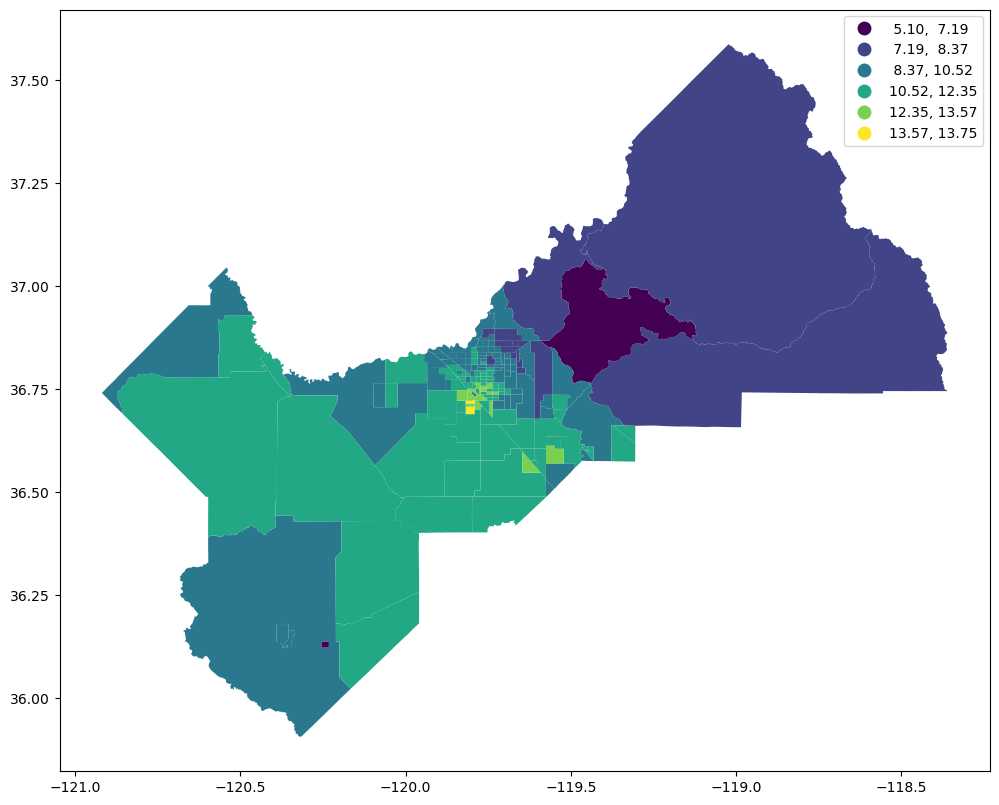

In [47]:
tracts_WeightedHVI.plot(figsize=(12,10),
                 column='Weighted_HVI',
                 legend=True, 
                 scheme='Percentiles')

<AxesSubplot:>

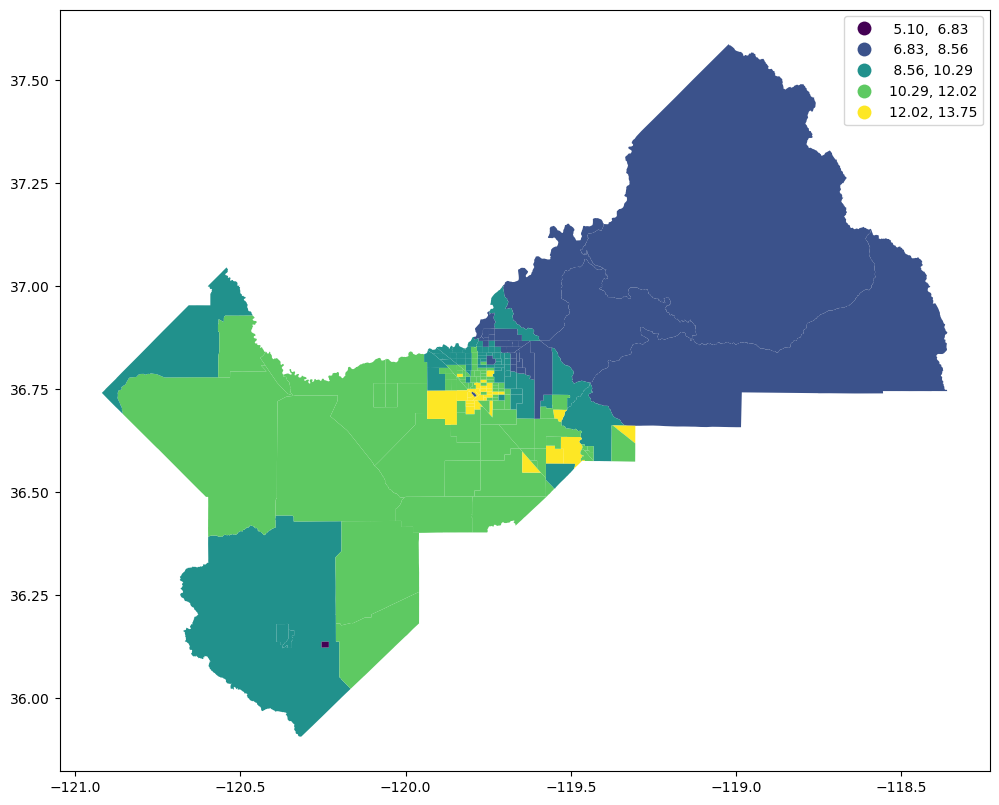

In [48]:
tracts_WeightedHVI.plot(figsize=(12,10),
                 column='Weighted_HVI',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

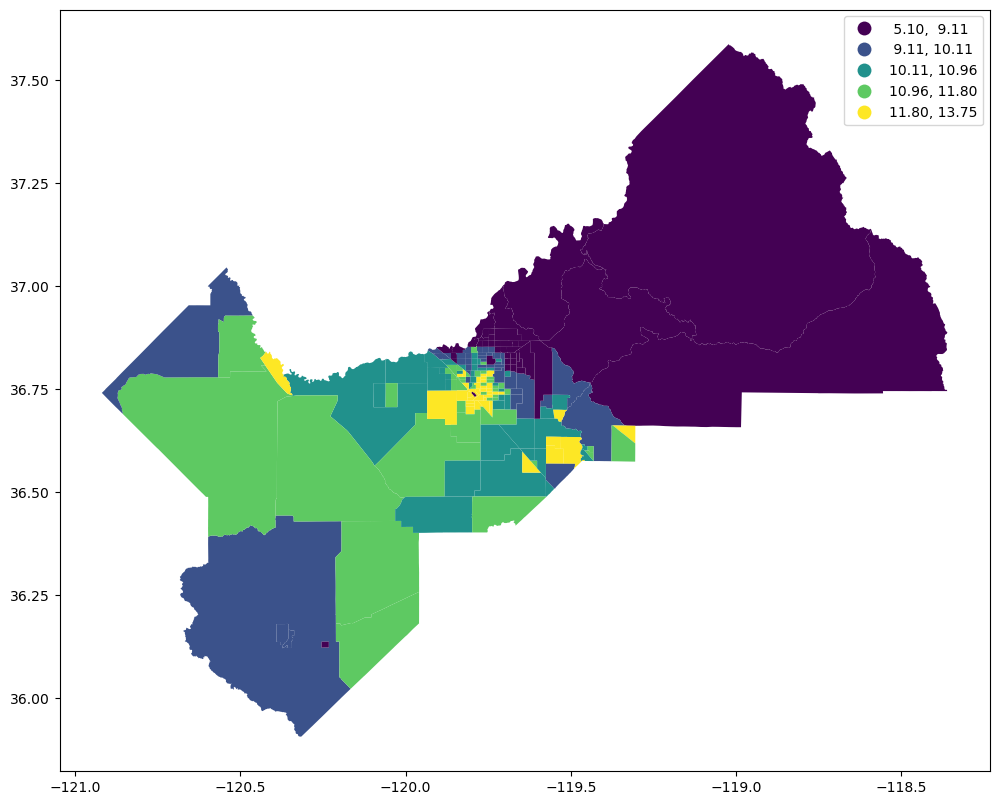

In [49]:
tracts_WeightedHVI.plot(figsize=(12,10),
                 column='Weighted_HVI',
                 legend=True, 
                 scheme='quantiles')

<div class="alert alert-info">

Now it's your turn! Create map plots based on other race indicators. Experiment with the different schemes to display variations of the same data, mapped differently.

</div>

## Additional mapping ideas
What does the majority ethnic cluster look like in Los Angeles?

In [ ]:
tracts_CardioVascular[tracts_CardioVascular.CardioVascular > 22]

In [ ]:
tracts_NoCanopy[tracts_NoCanopy.NoCanopy > .97].plot(figsize=(12,10),
                                             column='NoCanopy',
                                             legend=True, 
                                             scheme='NaturalBreaks')

In [ ]:
tracts_hvi[tracts_hvi.Weighted_HVI < 9].plot(figsize=(12,10),
                                             column='Weighted_HVI',
                                             legend=True, 
                                             scheme='NaturalBreaks')

In [ ]:
tracts_NoCanopy[tracts_NoCanopy.NoCanopy > .97].plot(figsize=(12,10),
                                             column='NoCanopy',
                                             legend=True, 
                                             scheme='NaturalBreaks')

## Folium



In [50]:
import folium

In [52]:
m = folium.Map(location=[36.5,-120], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_WeightedHVI, # geo data
                  data=tracts_WeightedHVI, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Weighted_HVI'], # [key, value]
                  fill_color='YlOrRd',
                  line_weight=0.1, 
                  fill_opacity=0.7,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Frsno County Heat Vulnerability Index').add_to(m)    # name on the legend color bar
m

In [53]:
m.save('fresno_HVI.html')